# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 07 </span>

In quest'esercitazione viene migliorato il codice che simula la dinamica di un sistema ad $N$ corpi, viene approfondito il concetto di autocorrelazione e verificata l'equivalenza tra MD e MC.

## <span style="color:blue"> Esercizio 07.1 </span>

Al codice di Molecular Dynamics / Monte Carlo (MD_MC.cpp) dell'esercitazione 4 sono state aggiunte le _tail corrections_ per l'energia potenziale per particella
$$ 
\frac{\langle V_{LJ} \rangle_{tail}}{N}=8\pi\rho\varepsilon \left[ \frac{1}{9}\left(\frac{\sigma}{r_c}\right)^{9}-\frac{1}{3}\left(\frac{\sigma}{r_c}\right)^{3} \right]
$$
e per la pressione
$$ 
\langle P \rangle_{tail}=32\pi\rho^2\varepsilon \left[ \frac{1}{9}\left(\frac{\sigma}{r_c}\right)^{9}-\frac{1}{6}\left(\frac{\sigma}{r_c}\right)^{3} \right]
$$

Esse sono state introdotte per compensare la comoda approssimazione fatta introducendo un raggio di cut-off per le interazioni da considerare.

## <span style="color:blue"> Esercizio 07.2 </span>

Dopo aver equilibrato il sistema, sono stati stampati $M=5\times10^5$ valori istantanei di energia potenziale per particella nelle condizioni termodinamiche dei tre stati della materia:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$, $r_c = 5.0$

Definita la funzione di autocorrelazione di un segnale come 

In [1]:
import numpy as np

def autocorrelation(data):
    n = len(data)
    mean = np.mean(data)
    autocorr = np.correlate(data - mean, data - mean, mode='full')[-n:]
    autocorr /= autocorr[0]  # Normalizza per il valore iniziale
    return autocorr

la si è calcolata per le misure di $U/N$ nei casi sopracitati e si sono ricavate le stime dei tre tempi di autocorrelazione tramite un fit esponenziale.

In [2]:
from scipy.optimize import curve_fit

def exp_func(x, a, tc):
    return a * np.exp(-x/tc)

# Funzione è vettore di x (col 0) e y (col 1)
def fit_exp(x, y):
    
    # Esegue il fit
    popt, pcov = curve_fit(exp_func, x, y)
    
    # Restituisce i valori del fit: popt[0]=a, popt[1]=tc
    return popt

### Solido

Stima tempo di autocorrelazione:  10.647236953033932


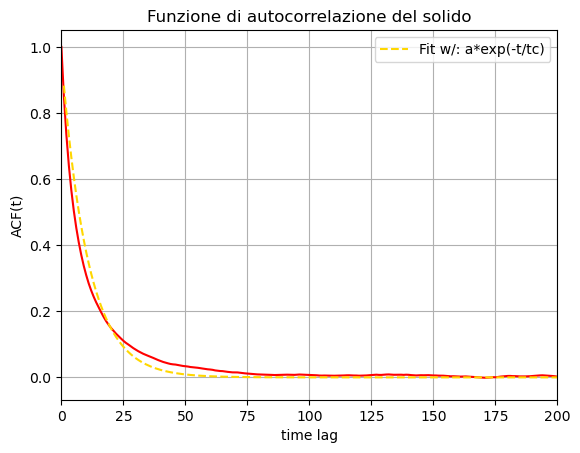

In [3]:
import matplotlib.pyplot as plt

# Dati (energia potenziale misurata ad istanti equispaziati)
filedata = np.loadtxt('S.instant_epot.out')
S_epot = filedata[:,1]
time = filedata[:,0]

# Calcola l'autocorrelazione e la fitta
autocorr = autocorrelation(S_epot)
par_fit = fit_exp(time, autocorr)

print("Stima tempo di autocorrelazione: ", par_fit[1])

y_fit = exp_func(time, par_fit[0], par_fit[1])

# Disegna la funzione di autocorrelazione
plt.plot(range(len(autocorr)), autocorr, color='red')
plt.plot(time, y_fit, color='gold', linestyle='dashed', label='Fit w/: a*exp(-t/tc)')
plt.xlabel('time lag')
plt.ylabel('ACF(t)')
plt.title('Funzione di autocorrelazione del solido')
plt.grid(True)

ax = plt.gca()
ax.set_xlim([0, 200])
    
plt.legend()

# Mostra il grafico
plt.show()

### Liquido

Stima tempo di autocorrelazione:  17.01165196699678


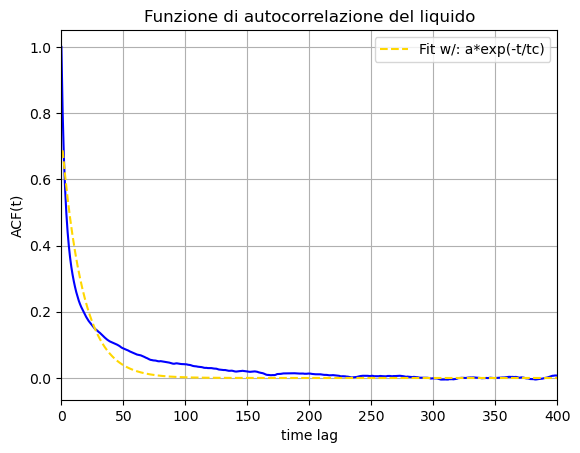

In [10]:
# Dati (energia potenziale misurata ad istanti equispaziati)
filedata = np.loadtxt('L.instant_epot.out')
L_epot = filedata[:,1]
time = filedata[:,0]

# Calcola l'autocorrelazione e la fitta
autocorr = autocorrelation(L_epot)
par_fit = fit_exp(time, autocorr)

print("Stima tempo di autocorrelazione: ", par_fit[1])

y_fit = exp_func(time, par_fit[0], par_fit[1])

# Disegna la funzione di autocorrelazione
plt.plot(range(len(autocorr)), autocorr, color='blue')
plt.plot(time, y_fit, color='gold', linestyle='dashed', label='Fit w/: a*exp(-t/tc)')
plt.xlabel('time lag')
plt.ylabel('ACF(t)')
plt.title('Funzione di autocorrelazione del liquido')
plt.grid(True)

ax = plt.gca()
ax.set_xlim([0, 400])
    
plt.legend()

# Mostra il grafico
plt.show()

### Gas

Stima tempo di autocorrelazione:  2.421189591262058


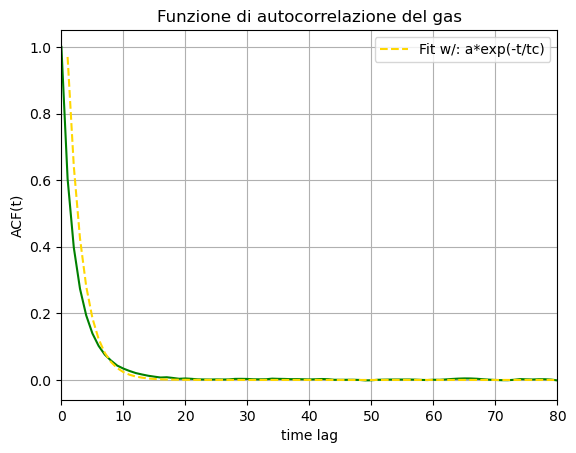

In [11]:
# Dati (energia potenziale misurata ad istanti equispaziati)
filedata = np.loadtxt('G.instant_epot.out')
G_epot = filedata[:,1]
time = filedata[:,0]

# Calcola l'autocorrelazione e la fitta con l'esponenziale
autocorr = autocorrelation(G_epot)
par_fit = fit_exp(time, autocorr)

print("Stima tempo di autocorrelazione: ", par_fit[1])

y_fit = exp_func(time, par_fit[0], par_fit[1])

# Disegna la funzione di autocorrelazione
plt.plot(range(len(autocorr)), autocorr, color='green')
plt.plot(time, y_fit, color='gold', linestyle='dashed', label='Fit w/: a*exp(-t/tc)')
plt.xlabel('time lag')
plt.ylabel('ACF(t)')
plt.title('Funzione di autocorrelazione del gas')
plt.grid(True)

ax = plt.gca()
ax.set_xlim([0, 80])
    
plt.legend()

# Mostra il grafico
plt.show()

Con gli stessi dati si è quindi studiato l'andamento della deviazione standard della media di $U/N$ in funzione della dimensione dei blocchi $L$ in cui si suddividono; affinché le misure siano statisticamente indipendenti, è importante che $L>>t_c$ dove $t_c$ sono i tempi di correlazione calcolati.

Per verificare ciò si è fatto variare $L\in[10,5000]$ sommando $+10$ al valore precedente. Le curve ottenute sono plottate in seguito.

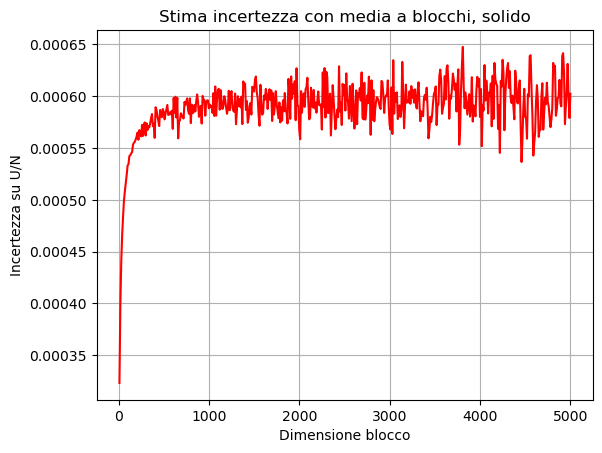

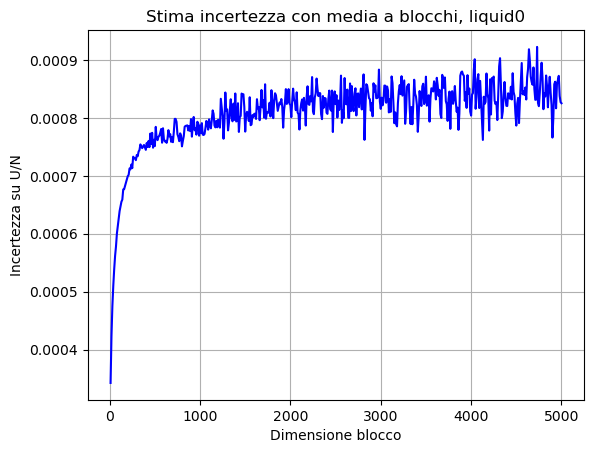

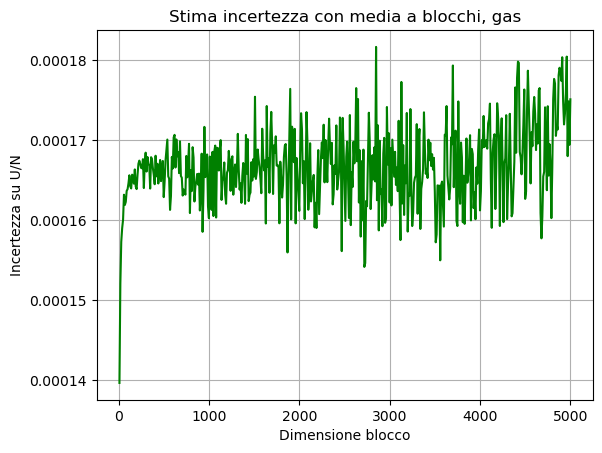

In [12]:
def data_blocking(data, phase, colour):
    nblocks = len(data)

    # Dimensioni dei blocchi
    block_sizes = np.arange(10, 5001, 10)

    # Creazione liste per i valori medi e le deviazioni standard per ogni dimensione del blocco
    means = []
    stds = []
    
    # scorro sulle dimensioni dei blocchi
    for block_size in block_sizes:
        nblocks = len(data) // block_size
        block_means = np.zeros(nblocks)    # Azzera i valori medi del blocco
        
        # Calcola i valori medi dei blocchi
        for i in range(nblocks):
            block_means[i] = np.mean(data[i * block_size:(i + 1) * block_size])
            
        # Calcola la media e l'errore finale di tutti i blocchi
        means.append(np.mean(block_means))
        stds.append(np.sqrt(np.mean(block_means ** 2) - np.mean(block_means) ** 2) / np.sqrt(len(block_means) - 1))

    # Crea il grafico
    plt.errorbar(block_sizes, stds, color=f'{colour}')
    plt.xlabel('Dimensione blocco')
    plt.ylabel('Incertezza su U/N')
    plt.title(f'Stima incertezza con media a blocchi, {phase}')
    plt.grid(True)
    plt.show()


data_blocking(S_epot, 'solido', 'red')
data_blocking(L_epot, 'liquid0', 'blue')
data_blocking(G_epot, 'gas', 'green')

Come si nota dai grafici, pur subendo fluttuazioni relativamente grandi, il valore della deviazione standard della media tende a stabilizzarsi dopo una certa dimensione del blocco. Ciò implica che usando dei valori di $L$ successivi a questo, gli errori che verranno calcolati nella simulazione saranno liberi da effetti dovuti all'autocorrelazione.

## <span style="color:blue"> Esercizio 07.3 </span>

Il codice è stato successivamente ampliato introducendo il calcolo della funzione di distribuzione radiale $g(r)$ con $r\in[0;a/2]$ ($a=$ lato del volume della simulazione), ovvero della funzione che descrive la probabilità di trovare due atomi a distanza $r$ relativamente alla probabilità attesa per una distribuzione completamente casuale alla stessa densità.

## <span style="color:blue"> Esercizio 07.4 </span>

Si è quindi svolta una simulazione con gli stessi parametri dell'argon riportati nella sezione 07.2 sia utilizzando l'algoritmo di Molecular Dynamics (MD) sia con l'algoritmo di Metropolis (MC).

Sono qui riportati i risultati (per $U/N$, $P$ e $g(r)$) e i confronti tra i due approcci alla risoluzione numerica del problema ad N corpi.

### Energia potenziale per particella

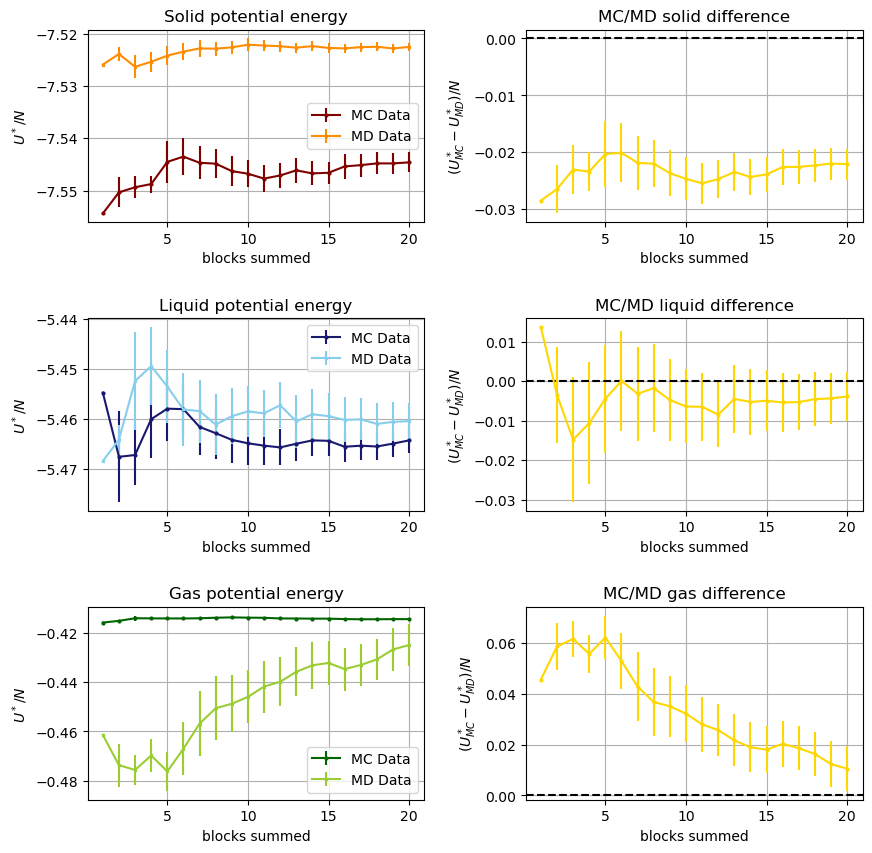

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file esterno
MCdata = np.loadtxt("MC.epot.out", usecols=(0,2,3))
MDdata = np.loadtxt('MD.epot.out', usecols=(0,2,3))

# Crea una figura con quattro assi
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Calcola la differenza tra i dati e il grafico teorico
diff = MCdata[:,1] - MDdata[:,1]
diff_err = MCdata[:,2] + MDdata[:,2]


# Plotta il grafico sull'asse sinistro in alto
axs[0,0].errorbar(MCdata[:20,0], MCdata[:20,1], yerr=MCdata[:20,2], fmt='o-', color='maroon', markersize=2, label='MC Data')
axs[0,0].errorbar(MDdata[:20,0], MDdata[:20,1], yerr=MDdata[:20,2], fmt='x-', color='darkorange', markersize=2, label='MD Data')
axs[0,0].set_title('Solid potential energy')
axs[0,0].set_xlabel("blocks summed")
axs[0,0].set_ylabel(r"$U^*/N$")
axs[0,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(MCdata[:20,0], diff[:20], yerr=diff_err[:20], fmt='o-', color='gold', markersize=2)
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('MC/MD solid difference')
axs[0,1].set_xlabel("blocks summed")
axs[0,1].set_ylabel(r"$(U^*_{MC}-U^*_{MD})/{N}$")


# Plotta il grafico sull'asse sinistro in alto
axs[1,0].errorbar(MCdata[20:40,0], MCdata[20:40,1], yerr=MCdata[20:40,2], fmt='o-', color='midnightblue', markersize=2, label='MC Data')
axs[1,0].errorbar(MDdata[20:40,0], MDdata[20:40,1], yerr=MDdata[20:40,2], fmt='x-', color='skyblue', markersize=2, label='MD Data')
axs[1,0].set_title('Liquid potential energy')
axs[1,0].set_xlabel("blocks summed")
axs[1,0].set_ylabel(r"$U^*/N$")
axs[1,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[1,1].errorbar(MCdata[20:40,0], diff[20:40], yerr=diff_err[20:40], fmt='o-', color='gold', markersize=2)
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('MC/MD liquid difference')
axs[1,1].set_xlabel("blocks summed")
axs[1,1].set_ylabel(r"$(U^*_{MC}-U^*_{MD})/{N}$")


# Plotta il grafico sull'asse sinistro in alto
axs[2,0].errorbar(MCdata[40:60,0], MCdata[40:60,1], yerr=MCdata[40:60,2], fmt='o-', color='darkgreen', markersize=2, label='MC Data')
axs[2,0].errorbar(MDdata[40:60,0], MDdata[40:60,1], yerr=MDdata[40:60,2], fmt='x-', color='yellowgreen', markersize=2, label='MD Data')
axs[2,0].set_title('Gas potential energy')
axs[2,0].set_xlabel("blocks summed")
axs[2,0].set_ylabel(r"$U^*/N$")
axs[2,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[2,1].errorbar(MCdata[40:60,0], diff[40:60], yerr=diff_err[40:60], fmt='o-', color='gold', markersize=2)
axs[2,1].axhline(y=0, color='black', linestyle='--')
axs[2,1].set_title('MC/MD gas difference')
axs[2,1].set_xlabel("blocks summed")
axs[2,1].set_ylabel(r"$(U^*_{MC}-U^*_{MD})/{N}$")


# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra il grafico
plt.show()

### Pressione

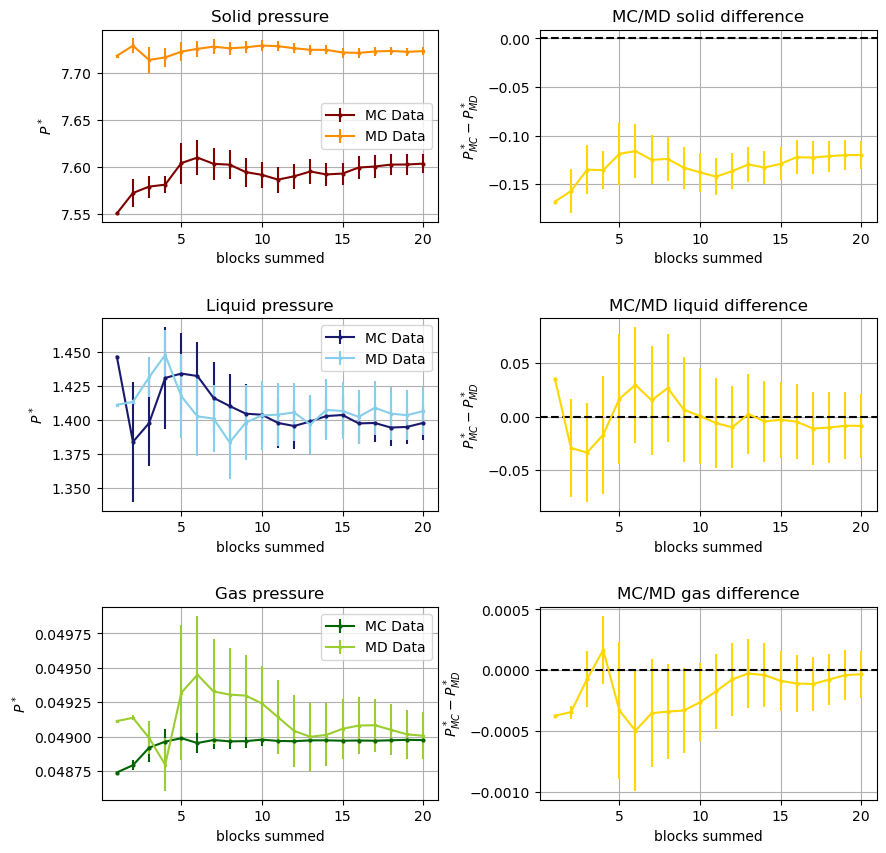

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file esterno
MCdata = np.loadtxt("MC.press.out", usecols=(0,2,3))
MDdata = np.loadtxt('MD.press.out', usecols=(0,2,3))

# Crea una figura con quattro assi
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Calcola la differenza tra i dati e il grafico teorico
diff = MCdata[:,1] - MDdata[:,1]
diff_err = MCdata[:,2] + MDdata[:,2]


# Plotta il grafico sull'asse sinistro in alto
axs[0,0].errorbar(MCdata[:20,0], MCdata[:20,1], yerr=MCdata[:20,2], fmt='o-', color='maroon', markersize=2, label='MC Data')
axs[0,0].errorbar(MDdata[:20,0], MDdata[:20,1], yerr=MDdata[:20,2], fmt='x-', color='darkorange', markersize=2, label='MD Data')
axs[0,0].set_title('Solid pressure')
axs[0,0].set_xlabel("blocks summed")
axs[0,0].set_ylabel(r"$P^*$")
axs[0,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(MCdata[:20,0], diff[:20], yerr=diff_err[:20], fmt='o-', color='gold', markersize=2)
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('MC/MD solid difference')
axs[0,1].set_xlabel("blocks summed")
axs[0,1].set_ylabel(r"$P^*_{MC}-P^*_{MD}$")


# Plotta il grafico sull'asse sinistro in alto
axs[1,0].errorbar(MCdata[20:40,0], MCdata[20:40,1], yerr=MCdata[20:40,2], fmt='o-', color='midnightblue', markersize=2, label='MC Data')
axs[1,0].errorbar(MDdata[20:40,0], MDdata[20:40,1], yerr=MDdata[20:40,2], fmt='x-', color='skyblue', markersize=2, label='MD Data')
axs[1,0].set_title('Liquid pressure')
axs[1,0].set_xlabel("blocks summed")
axs[1,0].set_ylabel(r"$P^*$")
axs[1,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[1,1].errorbar(MCdata[20:40,0], diff[20:40], yerr=diff_err[20:40], fmt='o-', color='gold', markersize=2)
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('MC/MD liquid difference')
axs[1,1].set_xlabel("blocks summed")
axs[1,1].set_ylabel(r"$P^*_{MC}-P^*_{MD}$")


# Plotta il grafico sull'asse sinistro in alto
axs[2,0].errorbar(MCdata[40:60,0], MCdata[40:60,1], yerr=MCdata[40:60,2], fmt='o-', color='darkgreen', markersize=2, label='MC Data')
axs[2,0].errorbar(MDdata[40:60,0], MDdata[40:60,1], yerr=MDdata[40:60,2], fmt='x-', color='yellowgreen', markersize=2, label='MD Data')
axs[2,0].set_title('Gas pressure')
axs[2,0].set_xlabel("blocks summed")
axs[2,0].set_ylabel(r"$P^*$")
axs[2,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[2,1].errorbar(MCdata[40:60,0], diff[40:60], yerr=diff_err[40:60], fmt='o-', color='gold', markersize=2)
axs[2,1].axhline(y=0, color='black', linestyle='--')
axs[2,1].set_title('MC/MD gas difference')
axs[2,1].set_xlabel("blocks summed")
axs[2,1].set_ylabel(r"$P^*_{MC}-P^*_{MD}$")


# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra il grafico
plt.show()

### Funzione di distribuzione radiale

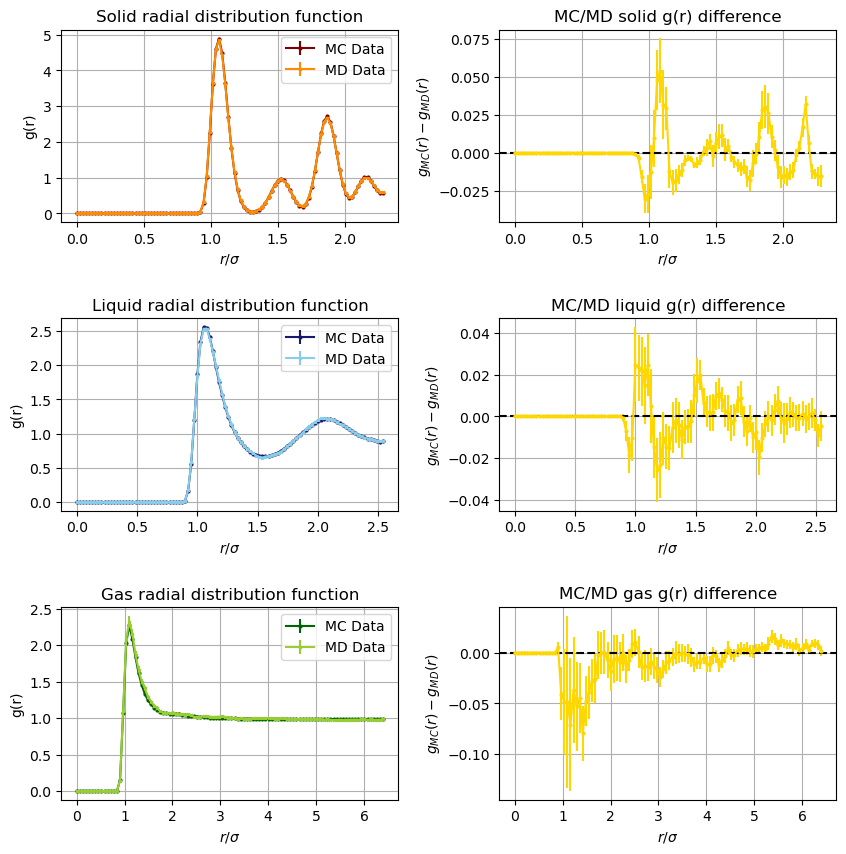

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file esterno
MCdata = np.loadtxt('MC.radial_dis.out')
MDdata = np.loadtxt('MD.radial_dis.out')

# Seleziona le righe con valore 20 nella prima colonna
selected_MCdata = MCdata[MCdata[:, 0] == 20]
selected_MDdata = MDdata[MDdata[:, 0] == 20]

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_MCdata[:,3] - selected_MDdata[:,3]
diff_err = selected_MCdata[:,4] + selected_MDdata[:,4]

# Crea una figura con quattro assi
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Plotta il grafico sull'asse sinistro in alto
axs[0,0].errorbar(selected_MCdata[:100,1], selected_MCdata[:100,3], yerr=selected_MCdata[:100,4], fmt='o-', color='maroon', markersize=2, label='MC Data')
axs[0,0].errorbar(selected_MDdata[:100,1], selected_MDdata[:100,3], yerr=selected_MDdata[:100,4], fmt='x-', color='darkorange', markersize=2, label='MD Data')
axs[0,0].set_title('Solid radial distribution function')
axs[0,0].set_xlabel(r"$r/\sigma$")
axs[0,0].set_ylabel("g(r)")
axs[0,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_MCdata[:100,1], diff[:100], yerr=diff_err[:100], fmt='o-', color='gold', markersize=2)
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('MC/MD solid g(r) difference')
axs[0,1].set_xlabel(r"$r/\sigma$")
axs[0,1].set_ylabel(r"$g_{MC}(r)-g_{MD}(r)$")


# Plotta il grafico sull'asse sinistro in alto
axs[1,0].errorbar(selected_MCdata[100:200,1], selected_MCdata[100:200,3], yerr=selected_MCdata[100:200,4], fmt='o-', color='midnightblue', markersize=2, label='MC Data')
axs[1,0].errorbar(selected_MDdata[100:200,1], selected_MDdata[100:200,3], yerr=selected_MDdata[100:200,4], fmt='x-', color='skyblue', markersize=2, label='MD Data')
axs[1,0].set_title('Liquid radial distribution function')
axs[1,0].set_xlabel(r"$r/\sigma$")
axs[1,0].set_ylabel("g(r)")
axs[1,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[1,1].errorbar(selected_MCdata[100:200,1], diff[100:200], yerr=diff_err[100:200], fmt='o-', color='gold', markersize=2)
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('MC/MD liquid g(r) difference')
axs[1,1].set_xlabel(r"$r/\sigma$")
axs[1,1].set_ylabel(r"$g_{MC}(r)-g_{MD}(r)$")


# Plotta il grafico sull'asse sinistro in alto
axs[2,0].errorbar(selected_MCdata[200:300,1], selected_MCdata[200:300,3], yerr=selected_MCdata[200:300,4], fmt='o-', color='darkgreen', markersize=2, label='MC Data')
axs[2,0].errorbar(selected_MDdata[200:300,1], selected_MDdata[200:300,3], yerr=selected_MDdata[200:300,4], fmt='x-', color='yellowgreen', markersize=2, label='MD Data')
axs[2,0].set_title('Gas radial distribution function')
axs[2,0].set_xlabel(r"$r/\sigma$")
axs[2,0].set_ylabel("g(r)")
axs[2,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[2,1].errorbar(selected_MCdata[200:300,1], diff[200:300], yerr=diff_err[200:300], fmt='o-', color='gold', markersize=2)
axs[2,1].axhline(y=0, color='black', linestyle='--')
axs[2,1].set_title('MC/MD gas g(r) difference')
axs[2,1].set_xlabel(r"$r/\sigma$")
axs[2,1].set_ylabel(r"$g_{MC}(r)-g_{MD}(r)$")

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra il grafico
plt.show()